In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data1 = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [4]:
!wget $data1

--2023-10-20 10:08:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.1'

     0K .......... .......... .......... .......... ..........  3% 40.7K 33s
    50K .......... .......... .......... .......... ..........  7% 20.8K 47s
   100K .......... .......... .......... .......... .......... 10% 18.0K 53s
   150K .......... .......... .......... .......... .......... 14% 59.4K 43s
   200K .......... .......... .......... .......... .......... 17% 21.5K 44s
   250K .......... .......... .......... .......... .......... 21% 56.8K 38s
   300K .......... .......... .......... .......... .......... 25% 46.7K 34s
   350K .......... ....

In [2]:
df =pd.read_csv('housing.csv.1')

In [3]:
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# select the variables needed from the ocean proximity column
allowed_values = ['INLAND','<1H OCEAN']


In [5]:
# SELECT ONLY DATA WHERE OCEAN PRPXIMITY IS EITHER INLAND OR <1H OCEAN
df = df[df['ocean_proximity'].isin(allowed_values)]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
# fill null values with zero
df = df.fillna(0)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
# perform log1p on median house value
df['median_house_value'] = np.log1p(df.median_house_value)
df['median_house_value']

701      12.973866
830      12.287657
859      12.419574
860      12.554971
861      12.287196
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 15687, dtype: float64

# Setting up Validation Frame work

In [9]:
# perfom train/validation/test using sklearn
from sklearn.model_selection import train_test_split

In [10]:
# divide the data into train,validation,test
df_full_train, df_test =train_test_split(df, test_size = 0.2, random_state=1 )

In [11]:
len(df_full_train), len(df_test)

(12549, 3138)

In [12]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
len(df_train), len(df_val), len(df_test)

(9411, 3138, 3138)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [16]:
del df_train['median_house_value']

del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
# use one hot encoding for categorical variables
from sklearn.feature_extraction import DictVectorizer

In [18]:
train_dicts = df_train.to_dict(orient='records')

In [19]:
dv = DictVectorizer(sparse=False)

In [20]:
X_train = dv.fit_transform(train_dicts)

In [21]:
val_dicts = df_val.to_dict(orient='records')

In [22]:
X_val = dv.transform(val_dicts)

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [24]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [25]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



C:\Users\LAPTOP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:

from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
y_pred = rf.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_pred))

0.24436922628647645

In [30]:
from tqdm.auto import tqdm

In [31]:
scores = []

for n in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    scores.append((n, score))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

  0%|          | 0/20 [00:00<?, ?it/s]

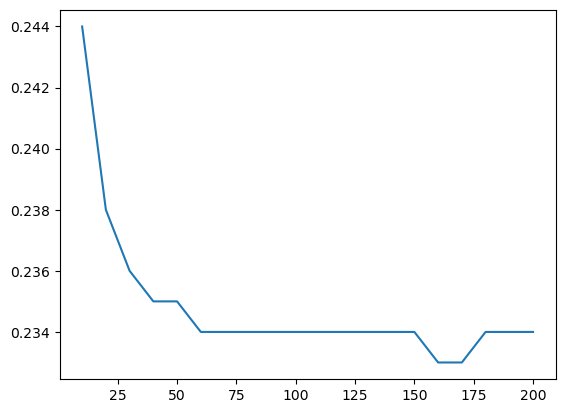

In [32]:
plt.plot(df_scores.n_estimators, df_scores.rmse.round(3))

In [33]:
scores = []

for d in tqdm([10, 15, 20, 25]):
    rf = RandomForestRegressor(n_estimators=0,
                               max_depth=d,
                               random_state=1, n_jobs=-1,
                               warm_start=True)

    for n in tqdm(range(10, 201, 10)):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((d, n, score))

columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

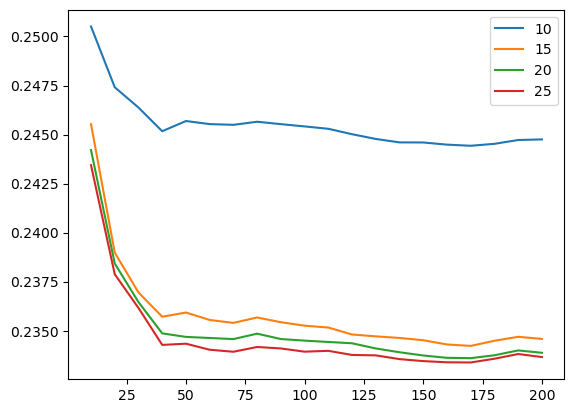

In [35]:
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()

In [41]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [42]:
df_importances = pd.DataFrame()
df_importances['feature'] = dv.get_feature_names()
df_importances['importance'] = rf.feature_importances_
df_importances

C:\Users\LAPTOP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,importance
0,households,0.015043
1,housing_median_age,0.030063
2,latitude,0.102665
3,longitude,0.085853
4,median_income,0.335486
5,ocean_proximity=<1H OCEAN,0.218820
6,ocean_proximity=INLAND,0.147460
7,population,0.028115
8,total_bedrooms,0.015434
9,total_rooms,0.021062


In [39]:
df_importances.sort_values(by='importance', ascending=False).head()

,feature,importance
4,median_income,0.335486
5,ocean_proximity=<1H OCEAN,0.218820
6,ocean_proximity=INLAND,0.147460
2,latitude,0.102665
3,longitude,0.085853


In [45]:
import xgboost as xgb


# Create DMatrix for train and validation data
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)

# Set up the watchlist for monitoring model performance
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

# Define the XGBoost parameters
xgb_params = {
    'eta': 0.3,  # This is the initial value; we'll tune it
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Specify the number of rounds for training
num_rounds = 100

# List of eta values to try
eta_values = [0.3, 0.1]

# Initialize a dictionary to store the evaluation results
eval_results = {}

for eta in eta_values:
    # Update the eta parameter
    xgb_params['eta'] = eta

    # Train the model for the specified number of rounds
    model = xgb.train(xgb_params, dtrain, num_rounds, evals=watchlist, evals_result=eval_results, verbose_eval=False)

    # Retrieve the evaluation results
    train_rmse = eval_results['train']['rmse'][-1]
    valid_rmse = eval_results['eval']['rmse'][-1]

    print(f"eta={eta}: Train RMSE = {train_rmse:.4f}, Validation RMSE = {valid_rmse:.4f}")

# Find the best eta based on validation RMSE
best_eta = min(eta_values, key=lambda eta: eval_results['eval']['rmse'][eta_values.index(eta)])
print(f"The best eta is {best_eta} with Validation RMSE = {eval_results['eval']['rmse'][eta_values.index(best_eta)]:.4f}")


eta=0.3: Train RMSE = 0.1166, Validation RMSE = 0.2290
eta=0.1: Train RMSE = 0.1700, Validation RMSE = 0.2323
The best eta is 0.1 with Validation RMSE = 9.3391
